In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
access_token = "708468451-6BCREqKeuhGumPkjzQiKl7IUskovs41UeCQ9x5bx"
access_token_secret = "g8DJ5Bulrsm2doWRJOrMPGonQsxiXaoT8uMglW6YpjUHc"
consumer_key = "OzwETQz630IQOJiAC5l3Mfz1H"
consumer_secret = "NGFTvI5ouclqytCuGLzDdLY9iXNgMF5a6Vm5h74k47KMvFw5LS"

In [3]:
#Basic Listener to print incoming tweets
class StdOutListener(StreamListener):
    def on_data(self,data):
        print(data)
        return True
    
    def on_error(self,status):
        print(status)
        

In [4]:
#Handles Twitter Auth and Connection to Twitter A/C
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
stream = Stream(auth,l)
api = tweepy.API(auth)
#This Filters Streams to capture data by Keyword
#stream.filter(track = ['python','javascript','ruby'])


In [5]:
user = api.me()
#print(user)
print('Name: ' + user.name)
print("Location: " + user.location)
print('Friends: ' + str(user.friends_count))

Name: Harsh_FTW!!
Location: India
Friends: 127


In [6]:
tweets = api.user_timeline(screen_name = 'realDonaldTrump' , count = 201,tweet_mode="extended")

datet = []
for tweet in tweets:
    datet.append(tweet.created_at)
tmp = []

tweets_for_csv = [tweet.full_text for tweet in tweets]
for j in tweets_for_csv:
    tmp.append(j)

In [7]:
len(tmp)

200

In [8]:
from country_list import countries

In [9]:
def fetch_tweets(id,count = 20):
    tmp = []
    for tweet in tweepy.Cursor(api.user_timeline, id, tweet_mode = "extended").items(count):
        tmp.append(tweet.full_text)
    return tmp

In [10]:
def read_sent_CSV(filename,delimiter = " "):
    df = pd.read_csv(filename)
    full_data = df.values.tolist()
    return full_data

In [11]:
def review_sent(tweets,neg_sents,pos_sents):
    ref_countries = {}
    sent_review = {}
    for country in countries:
        sent_c  = 0
        for tweet in tweets:
            if country['name'] in tweet:
                for sent in neg_sents:
                    if sent[0] in tweet:
                        sent_c -=1
                for sent in pos_sents:
                    if sent[0] in tweet:
                        sent_c +=1
                if country['name'] not in sent_review:
                    sent_review[country['name']] = 0
                if country['name'] not in ref_countries:
                    ref_countries[country['name']] = 0
                ref_countries[country['name']]+= 1
                sent_review[country['name']] = sent_c
    return ref_countries,sent_review

In [12]:
neg_sents = read_sent_CSV('negative_sent.csv')
pos_sents = read_sent_CSV('positive_sent.csv')

In [13]:
delegates = ['narendramodi' , 'realDonaldTrump', 'POTUS44']
sent_analysis = {}
for delegate in delegates:
    tweets = fetch_tweets(delegate,200)
    ref_countries , sent_review = review_sent(tweets,neg_sents,pos_sents)
    sent_analysis[delegate] = sent_review


In [14]:
delegate_countries = {'narendramodi':'India' ,'realDonaldTrump': 'United States' , 'POTUS44':'United States'}

print(sent_analysis)


{'narendramodi': {'Kyrgyzstan': -1, 'Kazakhstan': 1, 'Mongolia': 1, 'Lebanon': -1, 'Nepal': 1, 'Croatia': -1, 'Singapore': -4, 'Thailand': 1, 'Tajikistan': 1, 'Denmark': -1, 'Russia': 3, 'France': 0, 'Bahrain': 0, 'India': 42, 'Uzbekistan': 0, 'Poland': -1, 'Guatemala': 0, 'Afghanistan': -1}, 'realDonaldTrump': {'Japan': 1, 'Spain': 1, 'Singapore': 5, 'United States': -3, 'Iran': -9, 'Germany': -11, 'Italy': 3, 'Argentina': 0, 'North Korea': -16, 'Somalia': -7, 'Russia': -20, 'Canada': -5, 'Mexico': 6}, 'POTUS44': {'Syria': -3, 'Cuba': -2, 'Mexico': 1, 'India': 0, 'Mali': 0, 'Colombia': -1, 'Laos': -2, 'Liberia': 3, 'Canada': 2}}


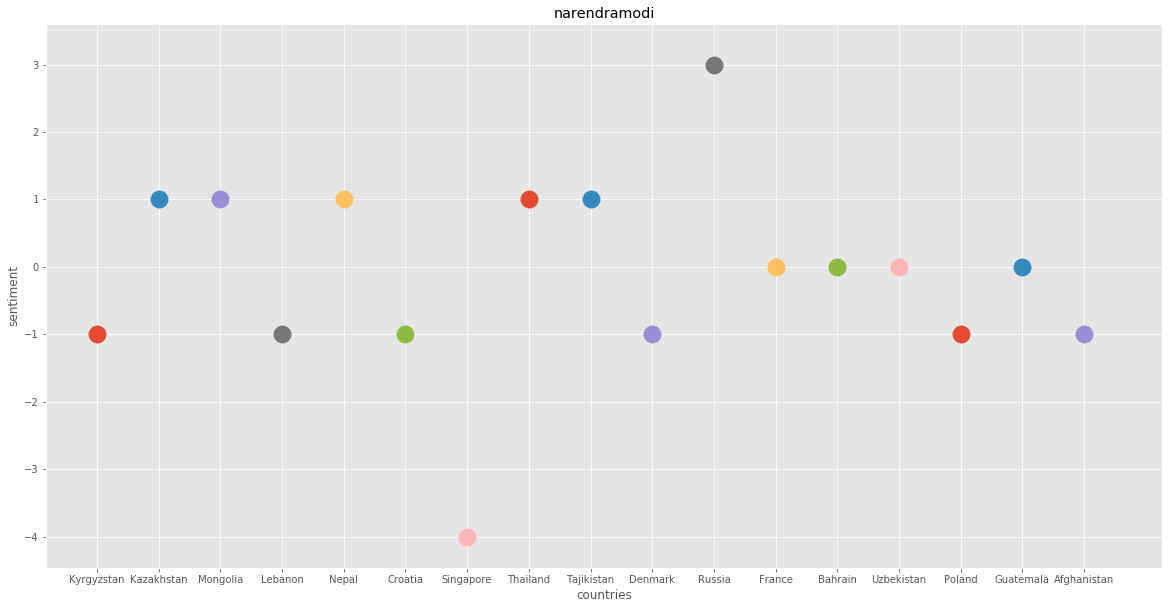

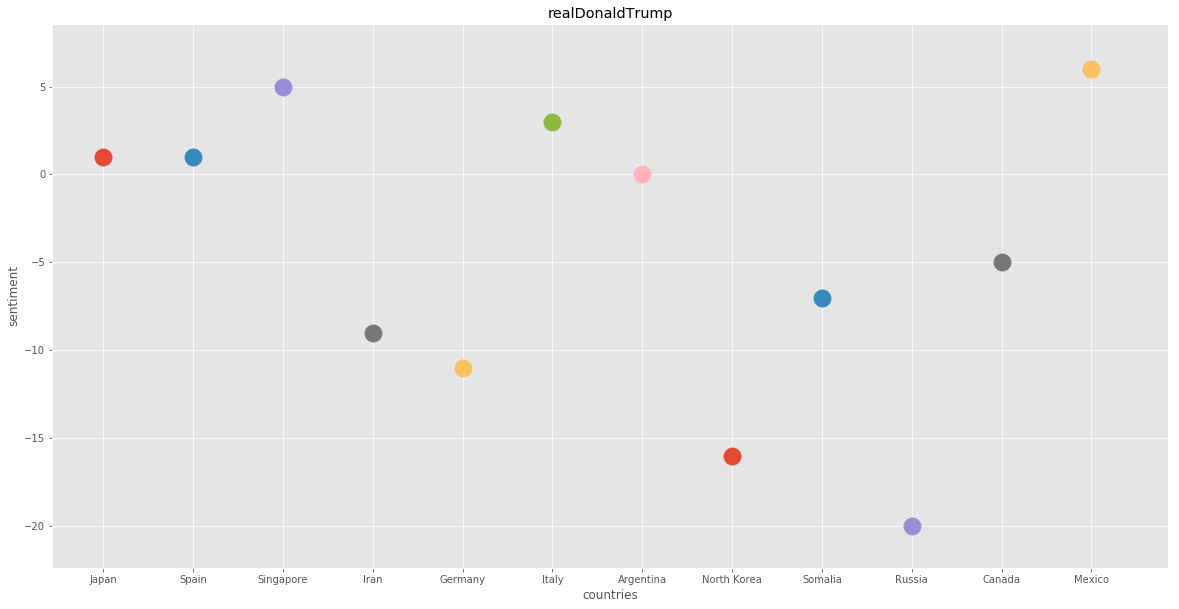

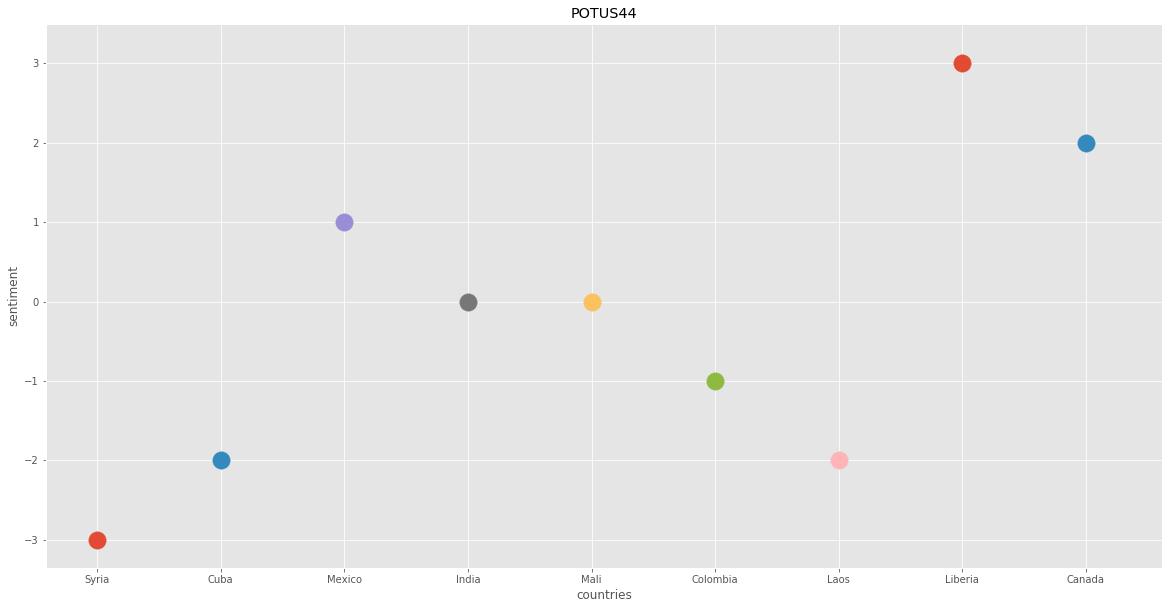

In [15]:
for delegate in delegates:
    plt.title(delegate)
    plt.xlabel('countries')
    plt.ylabel('sentiment')
    for country in sent_analysis[delegate]:
        if country != delegate_countries[delegate]:
            plt.scatter(country,sent_analysis[delegate][country],s=300)
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.show()